# Dicionario de dados

Dicionário dos dados é um documento muito importante para a pessoa cientista de dados e nele é possível encontrar descrições dos campos, valores e tipos. Nem sempre teremos uma boa documentação dos nossos dados, por exemplo. No nosso caso, conseguimos recorrer à documentação da API que forneceu os dados para essa base de dados.

Recomendo a leitura dos conceitos abaixo que foram feitos, em tradução livre, a partir da documentação e conheça melhor os dados. Durante a exploração, volte aqui sempre que tiver dúvida.

Acousticness/Acústica: variável numérica; medida de confiança de 0,0 a 1,0 se a faixa é acústica. O 1.0 representa alta confiança de que a faixa é acústica.

Danceability/Dançabilidade: variável numérica; a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos e 1,0 é o mais dançável.

Duration_ms: variável numérica; a duração da trilha em milissegundos.

Duration_min: variável numérica; a duração da faixa em minutos.

Energy/Energia: variável numérica; energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

Explicit/Explícito: variável categórica; se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

Id: o ID do Spotify para a faixa.

Instrumentalness/Instrumentalidade: variável numérica; prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

Key/Chave: variável numérica; a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo, 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

Liveness/Ao vivo: variável numérica; detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

Loudness/Volume em dB: variável numérica; volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som em relação à sua amplitude (“altura”), por medir a relação entre os picos e depressões de uma onda sonora. Os valores típicos variam entre -60 e 0 db.

Mode/Modo: variável numérica; o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

Popularity/Popularidade: variável numérica; a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

Speechiness/Fala: variável numérica; detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música estilo rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

Tempo: variável numérica; tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

Valence/Valência: variável numérica; medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (como, triste, deprimida, irritada).

In [5]:
!pip install pyspark

In [6]:
from pyspark.sql import SparkSession
import time

In [7]:
sessao_spark = SparkSession.builder\
                           .appName("Recomendador PySpark")\
                           .getOrCreate()
sessao_spark

In [8]:
from pyspark import SparkFiles

In [9]:
#url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
url_dados = '/content/dados_musicas.csv'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file://' + SparkFiles.get('/content/dados_musicas.csv')

In [10]:
dados = sessao_spark.read.csv(path_dados_file, header=True, sep=';', inferSchema=True)
%time

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 9.78 µs


In [11]:
dados.show()
%time

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [12]:
dados.printSchema()
%time

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.58 µs


In [13]:
dados.count()
%time

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.7 µs


In [14]:
len(dados.columns)
%time

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs


In [15]:
import pyspark.sql.functions as f

In [16]:
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).show()
%time

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [17]:
#dados.select('year').distinct().show()
print(sorted(dados.select('year').distinct().collect()))
%time

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


## Aula 2.2 - Analise de Dados

In [18]:
#url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
url_dados = '/content/dados_musicas_ano.csv'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file://' + SparkFiles.get('/content/dados_musicas_ano.csv')

In [19]:
dados_anos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema=True)

In [20]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [21]:
dados_anos = dados_anos.filter('year >= 2000')
dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [22]:
dados_anos.count()

21

In [23]:
len(dados_anos.columns)

14

# Documentacao do toPandas

In [24]:
import plotly.express as px

In [25]:
fig = px.line(dados_anos.toPandas(), x='year', y='loudness', markers=True, title='Variacao do loudness conforme os anos')
fig.show()

In [26]:
import plotly.graph_objects as go

In [27]:
fig = go.Figure()
temp = dados_anos.toPandas()

fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.update_layout(title='Variacao do Acousticness conforme os anos', xaxis_title='Ano', yaxis_title='Acousticness')

fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'], name='valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'], name='danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'], name='energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'], name='instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'], name='liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'], name='speechiness'))

fig.show()

## Aula 2.3 Matriz de Correlação

In [28]:
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(), text_auto=True)
fig.show()

# Aula 3 - Clusterizacao por genero

## Aula 3.1 PCA e StandartScaler

In [29]:
#url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
url_dados = '/content/dados_musicas_genero.csv'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file://' + SparkFiles.get('/content/dados_musicas_genero.csv')

In [30]:
dados_generos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema=True)

In [31]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [32]:
dados_generos.count()

2973

In [33]:
dados_generos.select('genres').distinct().count()

2973

In [34]:
len(dados_generos.columns)

14

In [35]:
from pyspark.ml.feature import VectorAssembler

In [36]:
dados_generos.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [37]:
X = dados_generos.drop('genres')

In [38]:
dados_generos_vector = VectorAssembler(inputCols=X.columns, outputCol='features').transform(dados_generos).select(['features', 'genres'])

In [39]:
dados_generos_vector.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [40]:
from pyspark.ml.feature import StandardScaler

In [41]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
dados_generos_scaler = scaler_model.transform(dados_generos_vector)


In [42]:
dados_generos_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

In [43]:
from pyspark.ml.feature import PCA

In [44]:
pca = PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
pca_model = pca.fit(dados_generos_scaler)
dados_generos_pca = pca_model.transform(dados_generos_scaler)

In [45]:
dados_generos_pca.show()

+--------------------+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|        pca_features|
+--------------------+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|[-2.5070953668885...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|[0.59696790566334...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|[4.15846027622355...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|[2.38734487851221...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|[2.65012183716790...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|[1.49650912033676...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|[3.92352077215732...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|[4.61101110983111...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101

In [46]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

In [47]:
from pyspark.ml.pipeline import Pipeline

In [48]:
# Contrucao Pipeline do ML
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X.columns, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='scaled_features'),
                                PCA(k=2, inputCol='scaled_features', outputCol='pca_features') ])

In [49]:
pca_pipeline_model = pca_pipeline.fit(dados_generos)

In [50]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [51]:
dados_generos_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [52]:
dados_generos_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

## K-means
https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/

In [53]:
from pyspark.ml.clustering import KMeans

In [54]:
SEED = 1224

In [55]:
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [56]:
model_kmeans = kmeans.fit(dados_generos_pca)

In [57]:
predictions_kmeans = model_kmeans.transform(dados_generos_pca)

In [58]:
predictions_kmeans.select('pca_features', 'cluster_pca').show(truncate=False)

+------------------------------------------+-----------+
|pca_features                              |cluster_pca|
+------------------------------------------+-----------+
|[-2.5070953668885663,-0.43816913737698293]|2          |
|[0.596967905663348,-4.981612052751353]    |2          |
|[4.158460276223559,0.83665250810799]      |4          |
|[2.3873448785122156,0.4877989015663361]   |0          |
|[2.650121837167907,0.575681976882043]     |0          |
|[1.4965091203367622,-1.8644183183717828]  |2          |
|[3.9235207721573224,-0.28518350023528705] |4          |
|[4.611011109831113,0.6783790472312338]    |1          |
|[2.8376900630842288,0.57129937165805]     |4          |
|[2.706690139892782,1.2593788079708255]    |0          |
|[4.698331383924286,-1.2765569680619455]   |3          |
|[3.375987496679866,-0.7560741064307498]   |4          |
|[5.608998877066019,-1.042731164439324]    |1          |
|[-0.2954946352117699,0.2763864586236268]  |2          |
|[2.572559106287041,1.316981543

# Aula 3.4 Plotando a clustering

In [59]:
from pyspark.ml.functions import vector_to_array

In [60]:
#pca_features_xy = predictions_kmeans.withColumns('x', vector_to_array('pca_features')[0])\
#                 .withColumn('y', vector_to_array('pca_features')[1]) \
#                 .select(['x', 'y', 'cluster_pca', 'genres'])

pca_features_xy = predictions_kmeans.withColumns(
    {
        "x": vector_to_array("pca_features").getItem(0),
        "y": vector_to_array("pca_features").getItem(1),
    }
).select(["x", "y", "cluster_pca", "genres"])

In [61]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
|-2.5070953668885663|-0.43816913737698293|          2|21st century clas...|
|  0.596967905663348|  -4.981612052751353|          2|               432hz|
|  4.158460276223559|    0.83665250810799|          4|               8-bit|
| 2.3873448785122156|  0.4877989015663361|          0|                  []|
|  2.650121837167907|   0.575681976882043|          0|          a cappella|
| 1.4965091203367622| -1.8644183183717828|          2|            abstract|
| 3.9235207721573224|-0.28518350023528705|          4|      abstract beats|
|  4.611011109831113|  0.6783790472312338|          1|    abstract hip hop|
| 2.8376900630842288|    0.57129937165805|          4|           accordeon|
|  2.706690139892782|  1.2593788079708255|          0|           accordion|
|  4.6983313

In [62]:
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['x','y','genres'])
fig.show()

In [63]:
# Explicacao da quantidade de atributos 0.29 explica 3 componentes X, 0.12 explica apenas 1 componentes y
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

In [64]:
X = dados.columns
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [65]:
dados_encoded_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados)
dados_encoded_vector.select('features').show(truncate=False, n=5)


+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [66]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
scaler_model = scaler.fit(dados_encoded_vector)
dados_musicas_scaler = scaler_model.transform(dados_encoded_vector)


In [67]:
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [69]:
# Tamanho do nosso K
k=len(X)
k

15

In [73]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca = pca_model.transform(dados_musicas_scaler)

In [74]:
sum(model_pca.explainedVariance) * 100

np.float64(100.00000000000003)

In [75]:
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

[np.float64(0.21297354127107349),
 np.float64(0.3459774162295507),
 np.float64(0.43989805678254446),
 np.float64(0.5267820578269103),
 np.float64(0.6001038103117929),
 np.float64(0.666571951365239),
 np.float64(0.7282174213581728),
 np.float64(0.7845103843321023),
 np.float64(0.8350002357002614),
 np.float64(0.8812446547406769),
 np.float64(0.9151737562703048),
 np.float64(0.9435370133056039),
 np.float64(0.9699018569070161),
 np.float64(0.9900947792885582),
 np.float64(1.0000000000000002)]

In [76]:
import numpy as np

In [77]:
k = sum(np.array(lista_valores) <= 0.7)
k

np.int64(6)

In [78]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = pca_model.transform(dados_musicas_scaler)


In [79]:
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                                                                                                                                                                                                     |
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444,-42.694

In [80]:
sum(model_pca.explainedVariance) * 100

np.float64(66.6571951365239)

## Aula 4.2 Aplicação do cluster com K-Means

In [81]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features') ])


In [82]:
model_pca_pipeline = pca_pipeline.fit(dados)

In [83]:
projection = model_pca_pipeline.transform(dados)


In [84]:
projection.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [106]:
kmeans = KMeans(k=5, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)

In [107]:
modelo_kmeans = kmeans.fit(projection)

In [108]:
projection_kmeans = modelo_kmeans.transform(projection)

In [109]:
projection_kmeans.select(['pca_features', 'cluster_pca']).show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------+-----------+
|pca_features                                                                                                          |cluster_pca|
+----------------------------------------------------------------------------------------------------------------------+-----------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |2          |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |3          |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|4          |
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |1          |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.277

In [110]:
projection_kmeans = projection_kmeans.withColumn('x', vector_to_array('pca_features')[0]) \
                  .withColumn('y', vector_to_array('pca_features')[1])


In [111]:
projection_kmeans.select(['x', 'y', 'cluster_pca', 'artists_song']).show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775702| -165.3684878490617|          2|   Coldplay - Yellow|
| -36.49885762774904|-167.85185045616547|          3|OutKast - Ms. Jac...|
| -35.46030091694054|-165.99633344577876|          4|Linkin Park - In ...|
| -35.56301325520582|-165.59515096480598|          1|3 Doors Down - Kr...|
| -36.54556974907565|-167.37512505802474|          3|Eminem - The Real...|
|  -36.7132222902623|  -166.482084830997|          1|Disturbed - Down ...|
| -36.01324617882219|-166.63514920955333|          1| Nelly - Ride Wit Me|
| -36.54268771210487| -166.9792823483323|          3|       Eminem - Stan|
|  -36.4252490097843|-165.10535006330755|          1|*NSYNC - Bye Bye Bye|
| -35.87207491577071| -166.0309883824791|          1|Britney Spears - ...|
|-31.639065936568734|-166

In [112]:
fig = px.scatter(projection_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig.show()

In [113]:
nome_musica = 'Taylor Swift - Blank Space'

In [114]:
cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
cluster

4

In [115]:
musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                        .select('artists_song', 'id', 'pca_features')
musicas_recomendadas.show()


+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Linkin Park - In ...|60a0Rd6pjrkxjPbaK...|[-35.460300916940...|
|Train - Drops of ...|2hKdd3qO7cWr2Jo0B...|[-34.321717368827...|
|Coldplay - The Sc...|75JFxkI2RXiU7L9VX...|[-33.101870314810...|
|Maroon 5 - She Wi...|4llK75pXNWZz6KAho...|[-34.809059512962...|
|Toby Keith - Cour...|0M7mWKqwTIaVjYyxf...|[-33.783934271861...|
|  Johnny Cash - Hurt|28cnXtME493VX9NOw...|[-32.970275978548...|
|Audioslave - Like...|3YuaBvuZqcwN3CEAy...|[-34.997748761321...|
|Ying Yang Twins -...|0r2Bul2NuCViraT2z...|[-34.426494116476...|
|   Coldplay - Clocks|0BCPKOYdS2jbQ8iyB...|[-34.034952873403...|
|The Chicks - Land...|5hviCr3lgg6LY6noG...|[-33.632652445823...|
| Stone Sour - Bother|0AfIsqZ4gTUg9CwwW...|[-32.762977558275...|
|Christina Aguiler...|3TCauNPqFiniaYHBv...|[-33.483230693542...|
|Alicia Keys - If ...|3XV

In [116]:
componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]
componentes_musica

DenseVector([-35.461, -166.9658, -12.7925, -137.9457, 13.1234, -4.1374])

In [117]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [118]:
def calcula_distance(value):
  return euclidean(value, componentes_musica)

udf_calcula_distance = f.udf(calcula_distance, FloatType())

musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))
recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

recomendadas.show()

+--------------------+--------------------+-------------------+
|        artists_song|                  id|               Dist|
+--------------------+--------------------+-------------------+
|Taylor Swift - Bl...|1p80LdxRV74UKvL8g...|                0.0|
|Imagine Dragons -...|4uGY9CqDtGtaTTLg1...|0.37921473383903503|
|Katy Perry - Bon ...|4rHmKlFRiFzabiVO6...|  0.547150194644928|
|The All-American ...|6ihL9TjfRjadfEePz...| 0.6039153933525085|
|J Balvin - No Es ...|5qFeMRz4TvetPmzjr...| 0.6140614151954651|
|Dan + Shay - Take...|72HP2M4jjw4t0AIGd...| 0.6286388635635376|
|Paramore - Fake H...|6t44iU80A0h8WQ7vc...| 0.6458516716957092|
|Wallows - Drunk o...|0z9dPcBhJvqO06QMa...| 0.6634693145751953|
|Darius Rucker - B...|36ISlLb12gKuCCVTY...| 0.6824935674667358|
|Kenny Chesney - T...|40ufL61vEaDaaOitY...| 0.7050514221191406|
+--------------------+--------------------+-------------------+



In [119]:
def recomendador(nome_musica):
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                          .select('artists_song', 'id', 'pca_features')
  componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]
  def calcula_distance(value):
    return euclidean(value, componentes_musica)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))
  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select(['artists_song']).show(truncate=False)





In [120]:
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|Katy Perry - Bon appétit                 |
|The All-American Rejects - Gives You Hell|
|J Balvin - No Es Justo                   |
|Dan + Shay - Take Me Home For Christmas  |
|Paramore - Fake Happy                    |
|Wallows - Drunk on Halloween             |
|Darius Rucker - Beers And Sunshine       |
|Kenny Chesney - Tip of My Tongue         |
+-----------------------------------------+



# Aula 5.3 Biblioteca Spotipy

In [121]:
! pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 6.4 MB/s eta 0:00:00


In [122]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials


In [123]:
 scope = "user-library-read playlist-modify-private"

 OAuth = SpotifyOAuth(
         scope=scope,
         redirect_uri='http://127.0.0.1:5000/callback',
         client_id='ed7194677be24b47bfeef20de4ec442a',
         client_secret='87fc955a70854f9da93c137babed3f86'
 )


In [124]:
client_credentials_manager = SpotifyClientCredentials(
    client_id='ed7194677be24b47bfeef20de4ec442a',client_secret='87fc955a70854f9da93c137babed3f86')

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [125]:
id = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('id').collect()[0][0]
id

'1p80LdxRV74UKvL8gnD7ky'

In [126]:
sp.track(id)

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640,
    'height': 640},
   {'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300,
    'height': 300},
   {'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64,
    'height': 64}],
  'name': '1989',
  'release_date': '2014-10-27',
  'release

In [143]:
def recomendador(nome_musica):
  # Calcula Musicas recomendadas
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
  musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                          .select('artists_song', 'id', 'pca_features')
  componentes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]
  def calcula_distance(value):
    return euclidean(value, componentes_musica)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))
  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'id', 'Dist'])

  recomendadas.select(['artists_song']).show(truncate=False)

  # Coletar informacoes da API.
  playlist_id = recomendadas.select('id').collect()

  playlist_track = []

  for id in playlist_id:
    playlist_track.append(sp.track(id[0]))

  return len(playlist_track)





In [128]:
recomendador('Taylor Swift - Blank Space')

+-----------------------------------------+
|artists_song                             |
+-----------------------------------------+
|Taylor Swift - Blank Space               |
|Imagine Dragons - Machine                |
|Katy Perry - Bon appétit                 |
|The All-American Rejects - Gives You Hell|
|J Balvin - No Es Justo                   |
|Dan + Shay - Take Me Home For Christmas  |
|Paramore - Fake Happy                    |
|Wallows - Drunk on Halloween             |
|Darius Rucker - Beers And Sunshine       |
|Kenny Chesney - Tip of My Tongue         |
+-----------------------------------------+



10

In [129]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.10.0


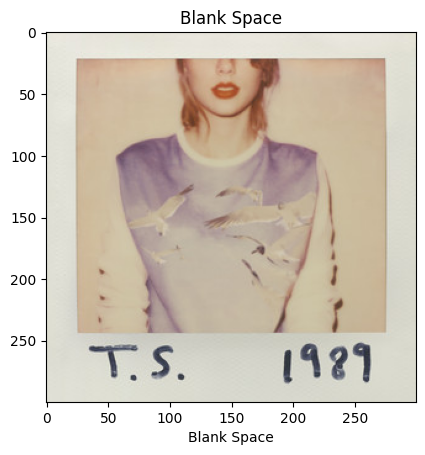

In [161]:
# @title Default title text
import matplotlib.pyplot as plt
from skimage import io

nome_musica = 'Taylor Swift - Blank Space'

id = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica)\
                      .select('id').collect()[0][0]
track = sp.track(id)

url = track['album']['images'][1]['url']
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.title(name)
plt.xlabel(name, fontsize = 10)
plt.show()


In [162]:
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name, url):

  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
    ax = plt.subplot(len(url) / columns + 1, columns, i + 1)
    image = io.imread(u)
    plt.imshow(image)
    ax.get_yaxis().set_visible(False)
    plt.xticks(color = 'w', fontsize = 0.1)
    plt.yticks(color = 'w', fontsize = 0.1)
    plt.tight_layout(h_pad=0.7, w_pad=0)
    plt.subplots_adjust(wspace=None, hspace=None)
    plt.grid(visible=None)
  plt.show()


In [163]:
playlist_id = recomendadas.select('id').collect()

name = []
url = []

for i in playlist_id:
  track = sp.track(i[0])
  url.append(track['album']['images'][1]['url'])
  name.append(track['name'])



In [164]:
playlist_id

[Row(id='1p80LdxRV74UKvL8gnD7ky'),
 Row(id='4uGY9CqDtGtaTTLg1cgsWD'),
 Row(id='4rHmKlFRiFzabiVO6e9w2e'),
 Row(id='6ihL9TjfRjadfEePzXXyVF'),
 Row(id='5qFeMRz4TvetPmzjre9Dq7'),
 Row(id='72HP2M4jjw4t0AIGdEVGEF'),
 Row(id='6t44iU80A0h8WQ7vc4OoRj'),
 Row(id='0z9dPcBhJvqO06QMaKelUE'),
 Row(id='36ISlLb12gKuCCVTYXC0gb'),
 Row(id='40ufL61vEaDaaOitYhnlQ7')]

In [167]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Autenticação (substitua pelas suas credenciais, se necessário)
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
     client_id='ed7194677be24b47bfeef20de4ec442a',
     client_secret='87fc955a70854f9da93c137babed3f86'
))

# Lista de Rows
playlist_ids = playlist_id

# Extrair apenas os IDs como strings
track_ids = [row['id'] for row in playlist_ids]

# Buscar todos os dados de uma vez (máx 50 por chamada)
tracks_info = sp.tracks(track_ids)

# Exibir nome e imagem de cada faixa
for track in tracks_info['tracks']:
    print(f"Nome: {track['name']}")
    print(f"Imagem: {track['album']['images'][1]['url']}")
    print('-' * 60)


Nome: Blank Space
Imagem: https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148
------------------------------------------------------------
Nome: Machine
Imagem: https://i.scdn.co/image/ab67616d00001e02da6f73a25f4c79d0e6b4a8bd
------------------------------------------------------------
Nome: Bon Appétit
Imagem: https://i.scdn.co/image/ab67616d00001e02cce6bab1f59b165133175d88
------------------------------------------------------------
Nome: Gives You Hell
Imagem: https://i.scdn.co/image/ab67616d00001e028f6b4035c82eb9cf42e9d8d7
------------------------------------------------------------
Nome: No Es Justo
Imagem: https://i.scdn.co/image/ab67616d00001e02dda2b86297d3bfb519f8b785
------------------------------------------------------------
Nome: Take Me Home For Christmas
Imagem: https://i.scdn.co/image/ab67616d00001e02a2f65aa2bdb6f4b8edaaf363
------------------------------------------------------------
Nome: Fake Happy
Imagem: https://i.scdn.co/image/ab67616d00001e02dbd83e179

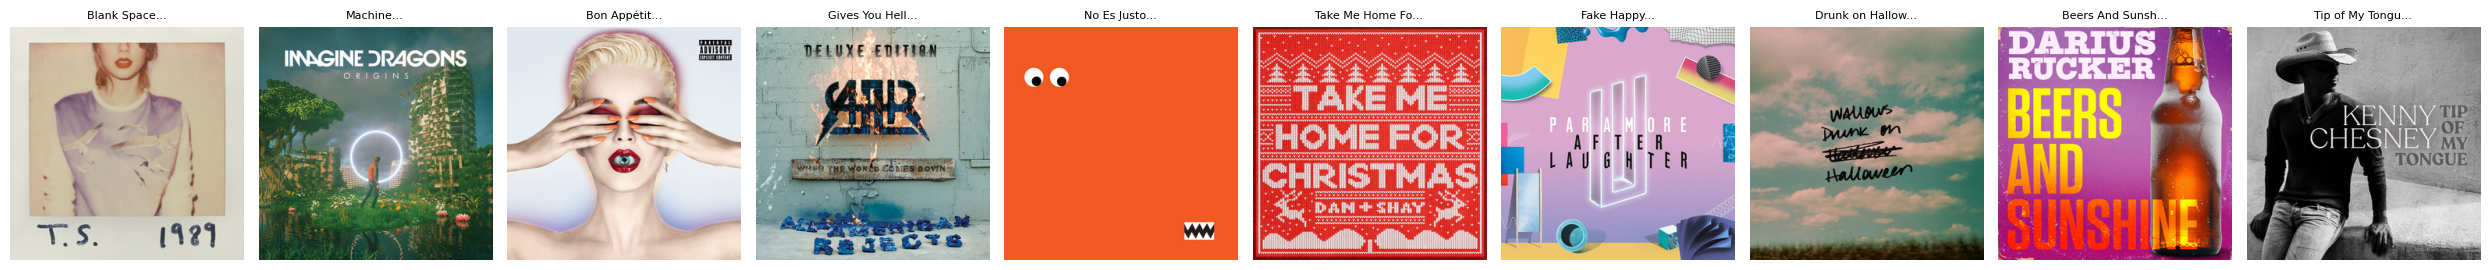

In [171]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Autenticação (substitua pelas suas credenciais se necessário)
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
     client_id='ed7194677be24b47bfeef20de4ec442a',
     client_secret='87fc955a70854f9da93c137babed3f86'
))

# IDs de faixas para exemplo (substitua pelos seus dados)
track_ids = [
    '1p80LdxRV74UKvL8gnD7ky',
    '4uGY9CqDtGtaTTLg1cgsWD',
    '4rHmKlFRiFzabiVO6e9w2e',
    '6ihL9TjfRjadfEePzXXyVF',
    '5qFeMRz4TvetPmzjre9Dq7',
    '72HP2M4jjw4t0AIGdEVGEF',
    '6t44iU80A0h8WQ7vc4OoRj',
    '0z9dPcBhJvqO06QMaKelUE',
    '36ISlLb12gKuCCVTYXC0gb',
    '40ufL61vEaDaaOitYhnlQ7'
]

# Buscar informações das faixas e URLs das imagens
images = []
names = []
for track_id in track_ids:
    track = sp.track(track_id)
    img_url = track['album']['images'][1]['url']
    response = requests.get(img_url)
    img = Image.open(BytesIO(response.content))
    images.append(img)
    names.append(track['name'])

# Plotar as imagens lado a lado
fig, axs = plt.subplots(1, len(images), figsize=(len(images)*2.5, 4))

for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(f"{names[i][:15]}...", fontsize=8)

plt.tight_layout()
plt.show()
